# MTH9879 Homework 1

Assigned: January 31, 2017.
Due: February 14, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr, stats, ggplot2
* Notes:
    * The running time of this notebook is around 8mins (MacOS i5)
    * The answers of Q3 and Q4 has been separated by figures and tables, but they are following the sequence of a-b-c-d.

In [1]:
# Loading libraries
library(repr) # For changing plot features
library(stats) # sd: standard deviation
library(ggplot2) # plot scatter plot with error bar

In [2]:
# Record the total running time of this notebook
# Starting record the time
ptm<-proc.time()

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

#### Answer of Q1
* The seller who triggered the Flash Crash of May 6, 2010 used the "Constant participation rate" strategy of executing the large "parent" order.


* The sub-orders themselves gave a false impression of large volume, accelerating the main order’s execution, since "parent" order was very large, even the trader adopted the startegy to split the oder. Then the order quickly exhausted the market's liquidity by hitting lower and lower quotes.
    * Also, the automated trding made possible by technological innovation makes markets more interlinked, the destabilizing action caused by the trader distorted the information sent to other participants.
    * And the end, the snowball effect cause the crash.


* Since the algorithm caused a crash when executed very large order, the potential amendments could be done as following:
    * Set stop conditions on cancellation or stop putting more orders. This is similar to put a stop order to limit the losses on holding a stock if its price nosedives.
    * Set a delay time interval (incease the delay time interval if it already has) of putting "child" orders, thereby the market could have some more time to react or recover the liquidity exhaused by the large order.
    
<font color="red">Comment: The main issue was that in calculating the participation rate it used volume that included it's own trades. So that caused a feedback loop. The algo could have also substracted it's own volume from total. -1pt </font>

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")

### 2. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

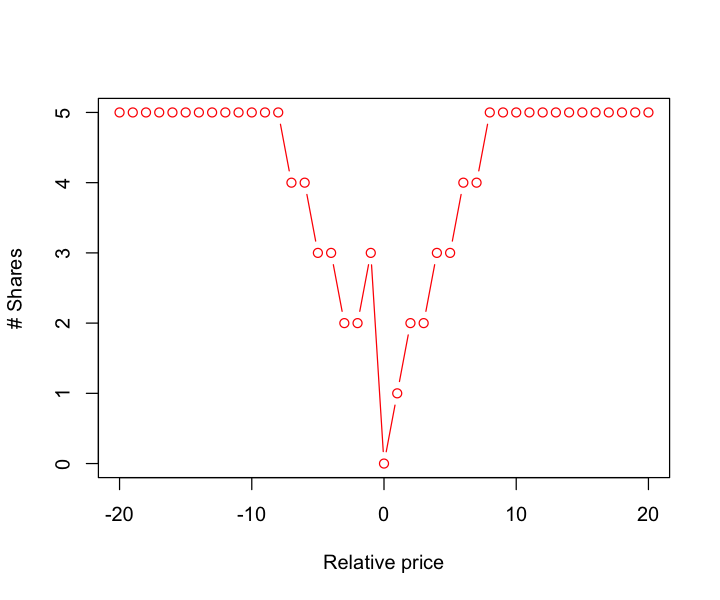

In [4]:
# Figure 1: Initial book shape
logging <- F  # Speed up the simulation

#Book setup
L <- 30 #Set number of price levels to be included in iterations

# Generate initial book
LL <- 1000 #Total number of levels in buy and sell books

# Initialize the order book with initializeBook5() function with asymptotic depth of 5 shares
initializeBook5()

# Add two orders to the bid side of the order book
limitBuyOrder(price=bestBid())
limitBuyOrder(price=bestBid())

# Plot the shape of updating order book
options(repr.plot.height=5, repr.plot.width=6)
plot(-20:20,bookShape(20),main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")

Figure 1 Initial order book shape with $\alpha$=1, $\mu$=10, $\delta$=1/5

### 3. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

#### Answer of a) and b)

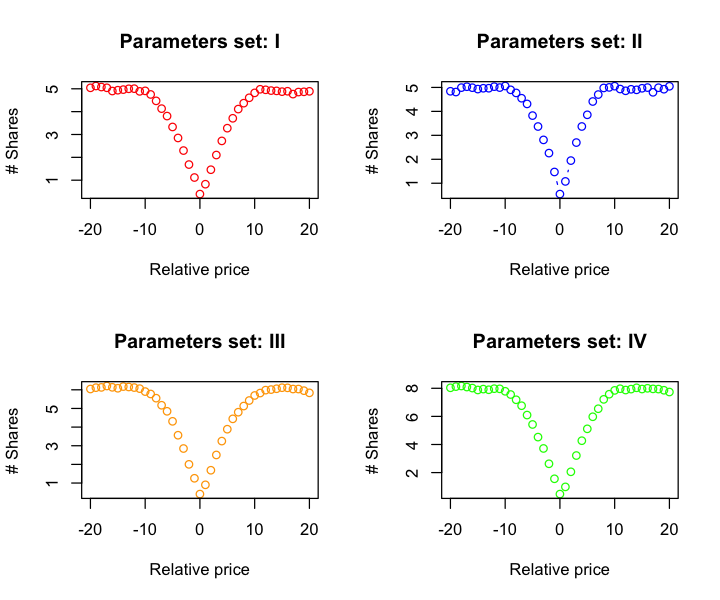

In [5]:
# a) and b)
# Create a list contains the parameter: alpha, mu, and delta (alpha are the same for all 4 sets)
Lalpha <- c(1,1,1,1)
Lmu<- c(10,8,10,10)
Ldelta<- c(1/5, 1/5,1/6,1/8)

# Get the length of input lists: number of sets
n<- length(Lalpha)

# Generate 100,000 evenets with the 4 sets parameters
NumEvents<- 100000 # Average over 100,000 events

AvgBookShapes<- c() # Empty list
    
for(i in 1:n){
    alpha<-Lalpha[i]
    mu<-Lmu[i]
    delta<-Ldelta[i]
    # Initialize the order book with initializeBook5() function 
    # with asymptotic depth of 5 shares
    initializeBook5()
    # Burn in for 100 events
    for(count in 1:100){
        generateEvent()
            
    }
    avgbookshape <- bookShape(20)/NumEvents

    for(count in 2:NumEvents){
        generateEvent()
        avgbookshape<-avgbookshape+bookShape(20)/NumEvents
    }
    AvgBookShapes<- c(AvgBookShapes,avgbookshape)
}
    
# Fill the data of 4 sets to a matrix
# The columns of the matrix corresponding to the sets of parameters (inputs)
data<-matrix(AvgBookShapes,nrow=length(avgbookshape),ncol = 4, byrow = FALSE)

# Plot the shapes of order books in one window by using par function
par(mfrow = c(2,2)) # combine the 4 plots in a 2 by 2 window filled by the row
set<- c('I','II','III','IV')
colors<- c("red","blue","orange","green")
for(i in 1:length(Lalpha)){
    plot(-20:20,data[,i],main=paste("Parameters set:",set[i]),xlab="Relative price",ylab="# Shares", col=colors[i], type="b")
}

   

Figure 2 Average order book shapes of 4 parameters sets with 100,000 events

#### Answer of c) and d)

In [6]:
# b) and c)
# Verification the slopes and depths
# Calculate the slopes and depths of dimentional analysis
dimA_slope<- c()
dimA_depth<- c()
for (i in 1:length(Lalpha)){
    dimA_slope<- c(dimA_slope,(Lalpha[i]^2)/(Lmu[i]*Ldelta[i]))
    dimA_depth<- c(dimA_depth,Lalpha[i]/Ldelta[i])
}

# Calculate the slopes and depths of simulation
sim_slope<- c()
sim_depth<- c()
for (i in 1: length(Lalpha)){
    # The columns of data corresponding to the sets of the parameters
    # From the Figure 2 above, chose average of 6 points left to midpoint(21) and 
    # 6 points right to the midpoint as the slopes
    sim_slope<- c(sim_slope,(abs(data[20,i]-data[14,i])/(20-14)+abs(data[27,i]-data[22,i])/(27-22))/2)
    # Choose the average of first and last 6 points as the depth
    sim_depth<- c(sim_depth,mean(data[c(1:6,length(data[,i])-5,length(data[,i])),i]))
}

verf<- data.frame(set,dimA_slope,sim_slope,dimA_depth,sim_depth)
# rename the columns of the result
colnames(verf)<- c('set','slope of dimentional analysis','slope of simulation',
                  'depth of dimentional analysis','depth of simulation')
verf

set,slope of dimentional analysis,slope of simulation,depth of dimentional analysis,depth of simulation
I,0.500,0.5396940,5,4.986565
II,0.625,0.5901790,5,4.949749
III,0.600,0.6801943,6,6.081871
IV,0.800,0.9323822,8,7.997543


Table 1 Order book slopes and depths comparison of dimentional analysis and ZI simulation with variety parameter sets

* The table shows that the slopes and depths (especially depths) of average order book with 100,000 events are very close to those of dimentional analysis

### The following code sets up the data required for Problem 4.

In [7]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

In [8]:
# Get the view of the data
# View is not supported in R kernel, use head instead
df<- data.frame(ziSimResults)
#df$Index<- seq.int(nrow(df))
head(df)

bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


Table 2 The head of *ziSimResults* data

#### Answer of a)

In [9]:
# Compute the mean of the mid price and standard deviation of the mean
mean_P<- c()
std_P<- c()

# The columns of df are pairs of 'bid-ask', thereby df contains (number of columns/2)
for(col in 1: (ncol(df)/2)){
    mid_P<- (df[[(col-1)*2+1]]+df[[col*2]])/2   # df[[i]]: get the numerical values of column i
    mean_P<- c(mean_P,mean(mid_P)) # mean function to calculate the mean of each mid price
    std_P<- c(std_P,sd(mid_P))   # sd function to calculate the standard deviation of mid price
}
std_P<- std_P/100   # Over 100 events
size<- seq.int(ncol(df)/2)

dfA<- data.frame(size,mean_P,std_P)
colnames(dfA)<- c('Size of qb','mean of mid price','std of the mean')
dfA

Size of qb,mean of mid price,std of the mean
1,0.00590,0.015379863
2,0.21550,0.014316301
3,0.41350,0.013108355
4,0.56635,0.012291150
5,0.66850,0.011233583
6,0.74110,0.010380166
7,0.80530,0.010190907
8,0.80955,0.009888385
9,0.83880,0.009779878
10,0.83435,0.009617315


Table 3 The mean of mid price and standard deviation of the mean for each size $q_b$ at the best bid

#### Answer of b) and c)

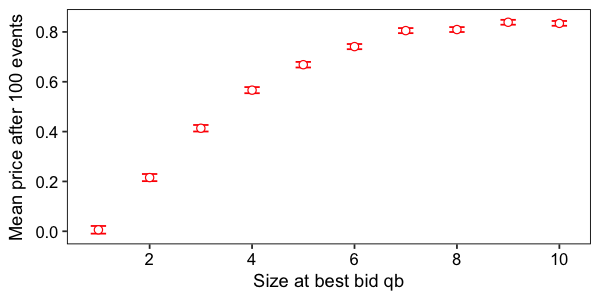

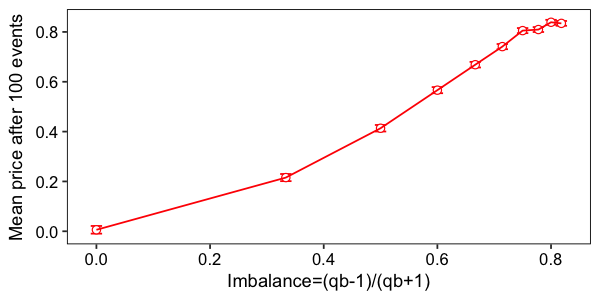

In [10]:
# Plot the mean vs size of best bid with error bar
options(repr.plot.height=2.5, repr.plot.width=5)
ggplot(dfA,aes(x=dfA[[1]], y=dfA[[2]]))+
geom_errorbar(aes(ymin=dfA[[2]]-dfA[[3]],ymax=dfA[[2]]+dfA[[3]]),width=.3,col="red")+
xlab('Size at best bid qb')+
ylab('Mean price after 100 events')+
geom_point(size=2,shape=21,fill="white",col="red")+
scale_x_continuous(breaks=seq(2,10,2))+
theme(panel.background = element_rect(fill="white",colour='black'),
      panel.grid.major=element_blank(),
     panel.grid.minor=element_blank(),
     axis.text=element_text(color='black',size=10))
# Change the theme of the ggplot to be similar as Figure 3 in the lecture notes

# c)
# Plot the mean vs imbalance (qb-1)/(qb+1)
ggplot(dfA,aes(x=((dfA[[1]]-1)/(dfA[[1]]+1)), y=dfA[[2]]))+
geom_errorbar(aes(ymin=dfA[[2]]-dfA[[3]],ymax=dfA[[2]]+dfA[[3]]),width=.02,col="red")+
xlab('Imbalance=(qb-1)/(qb+1)')+
ylab('Mean price after 100 events')+
geom_point(size=2,shape=21,fill="white",col="red")+
geom_line(col='red')+
scale_x_continuous(breaks=seq(0,1,0.2))+
scale_y_continuous(breaks=seq(0,1.0,0.2))+
theme(panel.background = element_rect(fill="white",colour='black'),
      panel.grid.major=element_blank(),
     panel.grid.minor=element_blank(),
     axis.text=element_text(color='black',size=10))
# Change the theme of the ggplot to be similar as Figure 7 in the lecture notes

Figure 3 With one share at best offer, future price change vs size at best bid (top, reproducing Figure 3 in the lecture notes) and book imbalance (bottom, reproducing Figure 7 in the lectue notes)

#### Answer of d)
* The price will increase in the future, if an order book with large quantity at the bid and small quantity at the offer as it shows in Figure 3
* The larger the size at the bid, the more increasing of the price in the future.

## Is the market price a martingale?

### 5. (4 points) 

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

#### Answer of Q5
* My answer to the derivatives quant is yes and no. Whether the asset prices are martingales or not depends on the conditions.
    * The ZI simulation (Figure 3) shows that the price will increase with larger quantity at bid side. However, this happens with conditional probability. In another words, we can predict future price, if we condition on the history information. **Thereby, asset prices are not martingales under this situation.**
    * As oppositie, if we do not condition on the history information, i.e., no information of previous time, **the asset prices are martingales.**
* I think the derivatives quant chose the side of 2nd condition to claim that the asset prices are martingales.

In [11]:
# End recording the running time
print('The running time of this notebooks is: ')
proc.time()-ptm

[1] "The running time of this notebooks is: "


   user  system elapsed 
464.347   3.807 477.965 